<a href="https://colab.research.google.com/github/LuisGeralda/LTE-KPI-Kmeans-Clustering/blob/main/LTE_KPI_Kmeans_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Import Dataset from my GitHub**

In [49]:
import requests
import zipfile
import io

# Download the ZIP file from GitHub
url = 'https://github.com/LuisGeralda/LTE-KPI-Kmeans-Clustering/raw/main/Dataset.zip'
response = requests.get(url)

# Extract the ZIP file
with zipfile.ZipFile(io.BytesIO(response.content)) as z:
    z.extractall('Dataset')

#**Merging the .csv files into one dataframe**


*I have 135 csv files and I want to merge into one PANDAS Dataframe.*

In [50]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import os
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_digits
import os
import glob
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from multiple files and folders
def load_data(base_path):
    data_frames = []
    for folder in os.listdir(base_path):
        folder_path = os.path.join(base_path, folder)
        if os.path.isdir(folder_path):
            for file in glob.glob(os.path.join(folder_path, '*.csv')):
                df = pd.read_csv(file)
                df['TransportMode'] = folder  # Add transport mode as a feature
                data_frames.append(df)
    return pd.concat(data_frames, ignore_index=True)

# Load and preprocess data
base_path = 'Dataset/Dataset'
df = load_data(base_path)
df.head(5)


,Timestamp,Longitude,Latitude,Speed,Operatorname,CellID,NetworkMode,RSRP,RSRQ,SNR,...,RSSI,DL_bitrate,UL_bitrate,State,NRxRSRP,NRxRSRQ,ServingCell_Lon,ServingCell_Lat,ServingCell_Distance,TransportMode
0,2017.12.04_13.35.53,-8.512364,51.891733,0,A,0,LTE,-109,-12,0.0,...,-88,3793,143,D,-106.0,-15.0,-8.485732,51.897244,1927.48,pedestrian
1,2017.12.04_13.35.53,-8.512364,51.891755,0,A,1,LTE,-105,-13,-2.0,...,-91,8712,235,D,-106.0,-15.0,-8.519837,51.896727,754.07,pedestrian
2,2017.12.04_13.35.54,-8.512364,51.891755,0,A,1,LTE,-105,-13,-2.0,...,-,4484,84,D,-107.0,-18.0,-8.519837,51.896727,754.07,pedestrian
3,2017.12.04_13.35.56,-8.512364,51.891755,0,A,0,LTE,-108,-16,-9.0,...,-,11228,208,D,-107.0,-18.0,-8.509472,51.895122,423.74,pedestrian
4,2017.12.04_13.35.57,-8.512364,51.891755,0,A,0,LTE,-108,-16,-9.0,...,-86,10792,227,D,-108.0,-16.0,-8.509472,51.895122,423.74,pedestrian


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174523 entries, 0 to 174522
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Timestamp             174523 non-null  object 
 1   Longitude             174523 non-null  float64
 2   Latitude              174523 non-null  float64
 3   Speed                 174523 non-null  int64  
 4   Operatorname          174523 non-null  object 
 5   CellID                174523 non-null  int64  
 6   NetworkMode           174523 non-null  object 
 7   RSRP                  174523 non-null  int64  
 8   RSRQ                  174523 non-null  object 
 9   SNR                   174523 non-null  object 
 10  CQI                   174523 non-null  object 
 11  RSSI                  174523 non-null  object 
 12  DL_bitrate            174523 non-null  int64  
 13  UL_bitrate            174523 non-null  int64  
 14  State                 174523 non-null  object 
 15  

#**Data Preprocessing**

*1. Delete unused columns in the Dataframe*

In [52]:
df.drop(columns=['Timestamp','Longitude','Latitude','Speed','Operatorname','CellID','NetworkMode','ServingCell_Lon','ServingCell_Lat','State','ServingCell_Distance','TransportMode'], inplace=True)
df.head(5)

,RSRP,RSRQ,SNR,CQI,RSSI,DL_bitrate,UL_bitrate,NRxRSRP,NRxRSRQ
0,-109,-12,0.0,2,-88,3793,143,-106.0,-15.0
1,-105,-13,-2.0,4,-91,8712,235,-106.0,-15.0
2,-105,-13,-2.0,5,-,4484,84,-107.0,-18.0
3,-108,-16,-9.0,5,-,11228,208,-107.0,-18.0
4,-108,-16,-9.0,7,-86,10792,227,-108.0,-16.0


*2. Handling null values*

(174523, 9)


<Axes: >

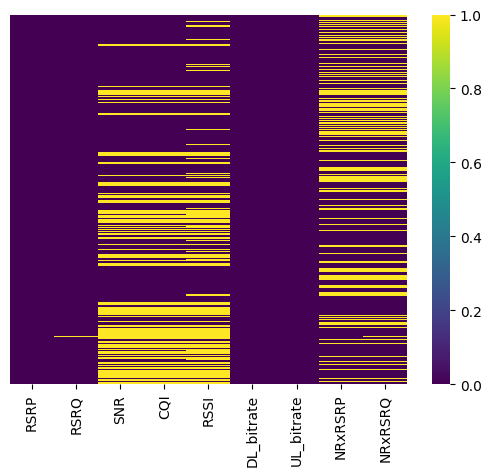

In [53]:
df.replace('-', np.nan, inplace=True)  # Replace '-' with NaN
print(df.shape)
df.head(5)
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

*3. Dropping rows with NaN values*

(61845, 9)


<Axes: >

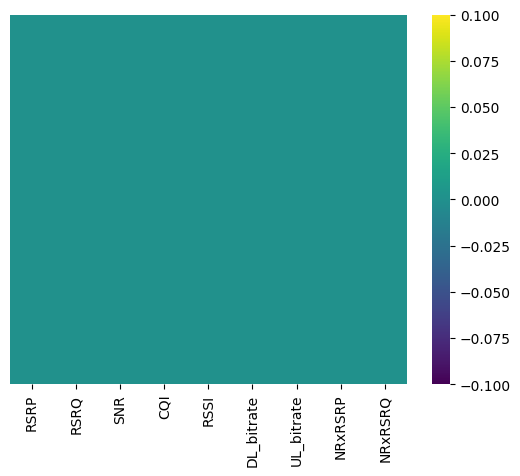

In [54]:
df.dropna(inplace=True)
print(df.shape)
df.isnull().sum()
sns.heatmap(df.isnull(), yticklabels=False, cmap= "viridis")

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 61845 entries, 0 to 174159
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RSRP        61845 non-null  int64 
 1   RSRQ        61845 non-null  object
 2   SNR         61845 non-null  object
 3   CQI         61845 non-null  object
 4   RSSI        61845 non-null  object
 5   DL_bitrate  61845 non-null  int64 
 6   UL_bitrate  61845 non-null  int64 
 7   NRxRSRP     61845 non-null  object
 8   NRxRSRQ     61845 non-null  object
dtypes: int64(3), object(6)
memory usage: 4.7+ MB


**Type casting to integer**

Issues are seen while trying to handle data because of the type.
Changing to integer should help.

In [59]:
print(df.columns)
dataframe_columns=df.columns
df[dataframe_columns] = df[dataframe_columns].astype(int)
df.info()

Index(['RSRP', 'RSRQ', 'SNR', 'CQI', 'RSSI', 'DL_bitrate', 'UL_bitrate',
       'NRxRSRP', 'NRxRSRQ'],
      dtype='object')


ValueError: invalid literal for int() with base 10: '-1.0'

*4. For a fair clustering, I need to rescale the features to have a common scale 1-10*

In [55]:
df = (df.subtract(df.min()).divide(df.max()-df.min())*9) + 1
df.head(5)

TypeError: '<=' not supported between instances of 'int' and 'str'